# Chitra Patel

# Import packages

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [13]:
mov = pd.read_excel('/Users/patelca/Desktop/WozU Data Science Program /Halloweeen Data Contest/HalloweenDatasetForPython.xlsx')
mov.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,2012-10-26,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,2017-01-13,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,30000
2,Sleepwalking (2017),Horror,2017-10-21,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,2013-04-23,//c,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,2015-04-10,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


# Data Wrangling

In [14]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              3328 non-null   object        
 1   Genres             3327 non-null   object        
 2   Release Date       3328 non-null   datetime64[ns]
 3   Release Country    3328 non-null   object        
 4   Movie Rating       1451 non-null   object        
 5   Review Rating      3076 non-null   float64       
 6   Movie Run Time     2784 non-null   object        
 7   Plot               3327 non-null   object        
 8   Cast               3314 non-null   object        
 9   Language           3257 non-null   object        
 10  Filming Locations  2096 non-null   object        
 11  Budget             1234 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 312.1+ KB


#### Droping missing data:

In [15]:
mov1 = mov.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [16]:
mov1.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
11,Rise of the Animals (2011),Adventure| Comedy| Horror,2012-05-01,USA,NOT RATED,3.6,70 min,"Directed by Chris Wojcik. With Greg Hoople, St...",Greg Hoople|Stephanie Motta|Adam Schonberg|Nik...,English,"Rochester, New York, USA",7000
16,Zombie Resurrection (2014),Horror,2015-03-23,UK,NOT RATED,2.7,86 min,"Directed by Jake Hawkins, Andy Phelps. With Er...",Eric Colvin|Jim Sweeney|Danny Brown|Simon Burb...,English,"Hampshire, England, UK","¬£100,000"
21,Before Dawn (2013),Horror,2013-06-08,Japan,NOT RATED,4.7,82 min,"Directed by Dominic Brunt. With Dominic Brunt,...",Dominic Brunt|Joanne Mitchell|Eileen O'Brien|N...,English,"Yorkshire, England, UK","¬£25,000"
22,Apparition (2015),Fantasy| Horror| Thriller,2015-05-05,USA,NOT RATED,4.0,100 min,"Directed by Quinn Saunders. With Katrina Law, ...",Katrina Law|Jody Quigley|Lili Bord√°n|Jarett A...,English,"Philadelphia, Pennsylvania, USA",3000000
30,Her Cry: La Llorona Investigation (2013),Horror,2013-04-19,USA,NOT RATED,5.4,89 min,Directed by Damir Catic. With Nichole Ceballos...,Nichole Ceballos|James Ezrin|Ron Gelner|Everar...,English,"Houston, Texas, USA",60000


- Separating min from Movie Run Time:

In [17]:
mov2 = mov1['Movie Run Time'].str.split(' ', expand=True).rename(columns = lambda x: "MRT" + str(x +1))

In [18]:
mov2.head()

,MRT1,MRT2
11,70,min
16,86,min
21,82,min
22,100,min
30,89,min


- Merging mov2:

In [19]:
mov3 = pd.concat([mov1, mov2], axis=1)

In [20]:
mov3.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,MRT1,MRT2
11,Rise of the Animals (2011),Adventure| Comedy| Horror,2012-05-01,USA,NOT RATED,3.6,70 min,"Directed by Chris Wojcik. With Greg Hoople, St...",Greg Hoople|Stephanie Motta|Adam Schonberg|Nik...,English,"Rochester, New York, USA",7000,70,min
16,Zombie Resurrection (2014),Horror,2015-03-23,UK,NOT RATED,2.7,86 min,"Directed by Jake Hawkins, Andy Phelps. With Er...",Eric Colvin|Jim Sweeney|Danny Brown|Simon Burb...,English,"Hampshire, England, UK","¬£100,000",86,min
21,Before Dawn (2013),Horror,2013-06-08,Japan,NOT RATED,4.7,82 min,"Directed by Dominic Brunt. With Dominic Brunt,...",Dominic Brunt|Joanne Mitchell|Eileen O'Brien|N...,English,"Yorkshire, England, UK","¬£25,000",82,min
22,Apparition (2015),Fantasy| Horror| Thriller,2015-05-05,USA,NOT RATED,4.0,100 min,"Directed by Quinn Saunders. With Katrina Law, ...",Katrina Law|Jody Quigley|Lili Bord√°n|Jarett A...,English,"Philadelphia, Pennsylvania, USA",3000000,100,min
30,Her Cry: La Llorona Investigation (2013),Horror,2013-04-19,USA,NOT RATED,5.4,89 min,Directed by Damir Catic. With Nichole Ceballos...,Nichole Ceballos|James Ezrin|Ron Gelner|Everar...,English,"Houston, Texas, USA",60000,89,min


In [21]:
mov3['Review Rating'] = mov3['Review Rating'].astype(int)

In [45]:
mov3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 11 to 3326
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              475 non-null    object        
 1   Genres             475 non-null    object        
 2   Release Date       475 non-null    datetime64[ns]
 3   Release Country    475 non-null    object        
 4   Movie Rating       475 non-null    object        
 5   Review Rating      475 non-null    int64         
 6   Movie Run Time     475 non-null    object        
 7   Plot               475 non-null    object        
 8   Cast               475 non-null    object        
 9   Language           475 non-null    object        
 10  Filming Locations  475 non-null    object        
 11  Budget             475 non-null    object        
 12  MRT1               475 non-null    object        
 13  MRT2               475 non-null    object        
dtypes: datet

In [22]:
mov3['MRT1'] = mov3['MRT1'].astype(int)

## Frequencies

In [152]:
mov1['Review Rating'].value_counts
mov1.sort_values('Review Rating', ascending=False)

<bound method IndexOpsMixin.value_counts of 11      3.6
16      2.7
21      4.7
22      4.0
30      5.4
       ... 
3319    6.1
3320    5.7
3322    6.3
3323    6.0
3326    3.0
Name: Review Rating, Length: 475, dtype: float64>

In [153]:
mov1.sort_values('Review Rating', ascending=False)

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
267,Psychedelia (2016),Fantasy| Horror| Sci-Fi| Thriller,2016-06-02,USA,NOT RATED,8.6,73 min,Directed by Manny Velazquez. With Adriana Carr...,Adriana Carradero|Alen Rios|Brianna Gonzalez|J...,English,"1147 N. Western Ave, Chicago, Illinois, USA",2000
2807,Blood Feast (2016),Horror,2017-06-23,USA,R,8.2,90 min,"Directed by Marcel Walz. With Robert Rusler, C...",Robert Rusler|Caroline Williams|Sophie Monk|Sa...,English,"Paris, France",1200000
1360,Savage High (2015),Horror| Mystery,2015-10-30,USA,NOT RATED,8.1,90 min,Directed by Manny Velazquez. With Marilyn Gonz...,Marilyn Gonzalez|Michael Glenn|Ashley Perez|Ia...,English,"1147 N. Western Ave, Chicago, Illinois, USA",2500
240,Dream Nightmare (2016),Fantasy| Horror,2016-12-30,USA,NOT RATED,8.0,75 min,"Directed by Manny Velazquez. With Alen Rios, R...",Alen Rios|Rich√†rd A. LaBon|Alex Velazquez|Sam...,English,"Chicago, Illinois, USA",500
2360,It (2017),Drama| Horror| Thriller,2017-09-08,USA,R,7.8,135 min,Directed by Andy Muschietti. With Bill Skarsg√...,Jaeden Lieberher|Jeremy Ray Taylor|Sophia Lill...,English,"Toronto, Ontario, Canada",35000000
...,...,...,...,...,...,...,...,...,...,...,...,...
892,Disciples (2014),Horror,2014-09-12,USA,R,2.1,90 min,"Directed by Joe Hollow. With Tom Lodewyck, Ton...",Tom Lodewyck|Tony Todd|Linnea Quigley|Angus Sc...,English,"Florida, USA",115000
70,Fetish Dolls Die Laughing (2012),Comedy| Fantasy| Horror,2012-04-24,USA,NOT RATED,2.0,100 min,"Directed by David Silvio. With Laura Romeo, Mi...",Laura Romeo|Michael McGovern|Aaron Bernard|Ang...,English,"Pittsburgh, Pennsylvania, USA",4000
358,90210 Shark Attack (2014),Drama| Horror| Sci-Fi,2014-10-01,USA,NOT RATED,1.9,75 min,"Directed by David DeCoteau. With Donna Wilkes,...",Donna Wilkes|Rachel Rosenstein|Braden Bacha|Je...,English,"24389 Dry Canyon Cold Creek Road, Calabasas, C...",1000000
1284,All Sinner's Night (2014),Horror,2014-06-09,USA,NOT RATED,1.9,90 min,Directed by Bobby Easley. With Heather Anderso...,Heather Anderson|Harry Bean|Dustin Boltjes|Zac...,English,"8590 N. Kitchen Rd. Moooresville, Indiana, USA",14000


In [154]:
mov1['Review Rating'].describe()

count    475.000000
mean       4.986105
std        1.307128
min        1.600000
25%        4.000000
50%        5.000000
75%        5.900000
max        8.600000
Name: Review Rating, dtype: float64

## Aggregate 

In [25]:
mov.groupby('Genres')['Release Country'].sum()

Genres
 Action| Adult| Comedy| Horror| Sci-Fi| Western                                                                        USA
 Action| Adventure| Comedy| Drama| Fantasy| Horror| Romance                                                          China
 Action| Adventure| Comedy| Drama| Fantasy| Horror| Romance| Thriller                                                  USA
 Action| Adventure| Comedy| Fantasy| Horror| Sci-Fi                                                                  Japan
 Action| Adventure| Comedy| Horror                                                                          AustraliaIndia
                                                                                               ...                        
 Horror| Thriller                                                        UKUSAUSAIndonesiaIndiaIndonesiaUSARussiaUSAGer...
 Horror| Thriller| War                                                                                        USACanadaUSA
 Horror| 

In [67]:
mov.groupby('Genres')['Review Rating'].sum()

Genres
 Action| Adult| Comedy| Horror| Sci-Fi| Western                             5.2
 Action| Adventure| Comedy| Drama| Fantasy| Horror| Romance                 6.8
 Action| Adventure| Comedy| Drama| Fantasy| Horror| Romance| Thriller       7.3
 Action| Adventure| Comedy| Fantasy| Horror| Sci-Fi                         5.6
 Action| Adventure| Comedy| Horror                                         11.7
                                                                          ...  
 Horror| Thriller                                                        2225.8
 Horror| Thriller| War                                                     15.1
 Horror| Thriller| Western                                                  4.6
 Horror| War                                                               15.0
 Horror| Western                                                            3.1
Name: Review Rating, Length: 261, dtype: float64

#### Looking at Top 4 countires with sum of review rating

In [26]:
mov4 = mov.groupby('Release Country')['Review Rating'].sum().reset_index()
mov4.sort_values('Review Rating', ascending=False)

,Release Country,Review Rating
67,USA,9608.3
66,UK,966.0
32,Japan,540.3
26,India,531.3
46,Philippines,344.2
...,...,...
7,Bolivia,5.0
33,Kazakhstan,4.7
0,//c,3.7
41,Nigeria,2.9


In [68]:
mov5 = mov.groupby('Genres')['Review Rating'].sum().reset_index()
mov5.sort_values('Review Rating', ascending=False)

,Genres,Review Rating
241,Horror,4408.8
256,Horror| Thriller,2225.8
170,Comedy| Horror,1204.9
248,Horror| Mystery| Thriller,870.3
225,Drama| Horror| Thriller,784.5
...,...,...
42,Action| Crime| Horror| Music| Thriller,2.4
86,Adventure| Comedy| Fantasy| Horror| Sci-Fi,2.4
250,Horror| Reality-TV| Thriller,0.0
52,Action| Drama| Horror| Mystery| Sci-Fi| Thriller,0.0


## Recoding -> Selecting top 4

In [27]:
releaseCountry = ['USA', 'UK','Japan', 'India']
m1 = mov3['Release Country'].isin(releaseCountry)
m2 = mov3[m1].copy()

In [28]:
m3 = m2[['Release Country','Review Rating']]

In [29]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 11 to 3326
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Release Country  397 non-null    object
 1   Review Rating    397 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.3+ KB


In [35]:
m3['Review Rating'] = m3['Review Rating'].astype(int)

<ipython-input-35-4c0ce8ba7dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m3['Review Rating'] = m3['Review Rating'].astype(int)


In [36]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 11 to 3326
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Release Country  397 non-null    object
 1   Review Rating    397 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.3+ KB


### Recoding Top 4 Countries to Numbers 

In [107]:
def recode (series):
    if series == "USA": 
        return 0
    if series == "UK": 
        return 1
    if series == "Japan": 
        return 2
    if series == "India": 
        return 3

mov3['TopCountriesR'] = mov3['Release Country'].apply(recode)

In [146]:
mov3.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,MRT,Min,TopCountriesR,GenresR
11,Rise of the Animals (2011),Adventure| Comedy| Horror,2012-05-01,USA,NOT RATED,3,70 min,"Directed by Chris Wojcik. With Greg Hoople, St...",Greg Hoople|Stephanie Motta|Adam Schonberg|Nik...,English,"Rochester, New York, USA",7000,70,min,0.0,None
16,Zombie Resurrection (2014),Horror,2015-03-23,UK,NOT RATED,2,86 min,"Directed by Jake Hawkins, Andy Phelps. With Er...",Eric Colvin|Jim Sweeney|Danny Brown|Simon Burb...,English,"Hampshire, England, UK","¬£100,000",86,min,1.0,None
21,Before Dawn (2013),Horror,2013-06-08,Japan,NOT RATED,4,82 min,"Directed by Dominic Brunt. With Dominic Brunt,...",Dominic Brunt|Joanne Mitchell|Eileen O'Brien|N...,English,"Yorkshire, England, UK","¬£25,000",82,min,2.0,None
22,Apparition (2015),Fantasy| Horror| Thriller,2015-05-05,USA,NOT RATED,4,100 min,"Directed by Quinn Saunders. With Katrina Law, ...",Katrina Law|Jody Quigley|Lili Bord√°n|Jarett A...,English,"Philadelphia, Pennsylvania, USA",3000000,100,min,0.0,None
30,Her Cry: La Llorona Investigation (2013),Horror,2013-04-19,USA,NOT RATED,5,89 min,Directed by Damir Catic. With Nichole Ceballos...,Nichole Ceballos|James Ezrin|Ron Gelner|Everar...,English,"Houston, Texas, USA",60000,89,min,0.0,None


In [160]:
def recode (series):
    if series == "Horror": 
        return 0
    if series == "Horror| Thriller": 
        return 1
    if series == "Comedy| Horror": 
        return 2
    if series == "Horror| Mystery| Thriller": 
        return 3
mov3['GenresR'] = mov3['Genres'].apply(recode)

In [161]:
mov3.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,MRT,Min,TopCountriesR,GenresR
11,Rise of the Animals (2011),Adventure| Comedy| Horror,2012-05-01,USA,NOT RATED,3,70 min,"Directed by Chris Wojcik. With Greg Hoople, St...",Greg Hoople|Stephanie Motta|Adam Schonberg|Nik...,English,"Rochester, New York, USA",7000,70,min,0.0,None
16,Zombie Resurrection (2014),Horror,2015-03-23,UK,NOT RATED,2,86 min,"Directed by Jake Hawkins, Andy Phelps. With Er...",Eric Colvin|Jim Sweeney|Danny Brown|Simon Burb...,English,"Hampshire, England, UK","¬£100,000",86,min,1.0,None
21,Before Dawn (2013),Horror,2013-06-08,Japan,NOT RATED,4,82 min,"Directed by Dominic Brunt. With Dominic Brunt,...",Dominic Brunt|Joanne Mitchell|Eileen O'Brien|N...,English,"Yorkshire, England, UK","¬£25,000",82,min,2.0,None
22,Apparition (2015),Fantasy| Horror| Thriller,2015-05-05,USA,NOT RATED,4,100 min,"Directed by Quinn Saunders. With Katrina Law, ...",Katrina Law|Jody Quigley|Lili Bord√°n|Jarett A...,English,"Philadelphia, Pennsylvania, USA",3000000,100,min,0.0,None
30,Her Cry: La Llorona Investigation (2013),Horror,2013-04-19,USA,NOT RATED,5,89 min,Directed by Damir Catic. With Nichole Ceballos...,Nichole Ceballos|James Ezrin|Ron Gelner|Everar...,English,"Houston, Texas, USA",60000,89,min,0.0,None


_____

# Running One Correlation

#### - Review Rating and Movie Run Time

In [155]:
mov3.rename(columns={"MRT1": "MRT", "MRT2": "Min"}, inplace=True)

In [159]:
mov3['Review Rating'].corr(mov3['MRT'])

0.30890899482767753

# Running One Correaltion 
#### - Top 4 Countires and Review Rating

In [66]:
mov3['Review Rating'].corr(mov3['TopCountriesR'])

-0.04898306917084677

#### - Review Rating and Genres

In [145]:
mov3['Review Rating'].corr(mov3['GenresR'])

nan

_______

## One Way Between Subjects ANOVAs
- Review Rating as a independent variable by countires

In [95]:
oneway = mov3[['TopCountriesR','Review Rating']]

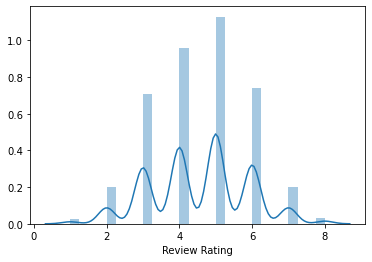

In [96]:
sns.distplot(oneway['Review Rating'])

In [98]:
oneway['ReviewRatingSQRT'] = np.sqrt(oneway['Review Rating'])

<ipython-input-98-1642cc612ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneway['ReviewRatingSQRT'] = np.sqrt(oneway['Review Rating'])


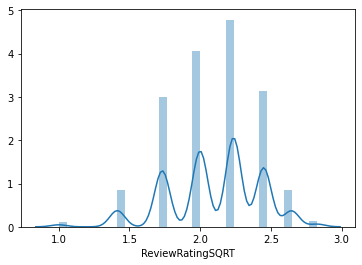

In [99]:
sns.distplot(oneway['ReviewRatingSQRT'])

#### Bartlett's Test

In [7]:
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [103]:
scipy.stats.bartlett(oneway['ReviewRatingSQRT'], oneway['TopCountriesR'])

BartlettResult(statistic=15.445206076675378, pvalue=8.49321054895021e-05)

#### Fligner's Test

In [104]:
scipy.stats.fligner(oneway['ReviewRatingSQRT'], oneway['TopCountriesR'])

FlignerResult(statistic=590.174308964049, pvalue=2.2961182784268846e-130)

*Have violated the assumption as p<0.05.*

### Computing ANOVAs with Equal Variance 

In [75]:
stats.f_oneway(mov1['Review Rating'][mov1['Release Country']=='USA'],
                    mov1['Review Rating'][mov1['Release Country']=='UK'],
                    mov1['Review Rating'][mov1['Release Country']=='Japan'],
                    mov1['Review Rating'][mov1['Release Country']=='India'])

F_onewayResult(statistic=0.5767387781542792, pvalue=0.6305915187907158)

*p > 0.05, there is not a significant difference between the 4 countires.*

#### Post Hocs

In [83]:
postHoc = MultiComparison(oneway['ReviewRatingSQRT'], oneway['TopCountriesR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   0.0    1.0  -0.0089   0.9 -0.2868  0.269  False
   0.0    2.0  -0.1309   0.9 -0.6715 0.4096  False
   0.0    3.0  -0.1023   0.9 -1.5208 1.3161  False
   0.0    nan   0.1337   0.9 -1.2847 1.5522  False
   0.0    nan  -0.3703   0.9 -1.7887 1.0482  False
   0.0    nan  -0.3703   0.9 -1.7887 1.0482  False
   0.0    nan  -0.3703   0.9 -1.7887 1.0482  False
   0.0    nan   0.1337   0.9 -1.2847 1.5522  False
   0.0    nan  -0.1023   0.9 -1.5208 1.3161  False
   0.0    nan   0.1337   0.9 -1.2847 1.5522  False
   0.0    nan   0.1337   0.9 -1.2847 1.5522  False
   0.0    nan  -0.3703   0.9 -1.7887 1.0482  False
   0.0    nan  -0.1023   0.9 -1.5208 1.3161  False
   0.0    nan  -0.1023   0.9 -1.5208 1.3161  False
   0.0    nan  -0.1023   0.9 -1.5208 1.3161  False
   0.0    nan  -0.1023   0.9 -1.5208 1.3161  False
   0.0    nan  -0.6881   0.9 -

In [163]:
mov3.groupby('TopCountriesR').mean()

,Review Rating,MRT
TopCountriesR,,
0.0,4.531856,92.833795
1.0,4.464286,94.535714
2.0,4.000000,89.571429
3.0,4.000000,86.000000


*- One way test did not quite worked out as I thought. But the mean is not significantly different from each other*

## Independent Chi-Square

In [106]:
import pandas as pd
from scipy import stats

In [148]:
ics = pd.crosstab(mov3['TopCountriesR'], mov3['Review Rating'])
ics

Review Rating,1,2,3,4,5,6,7,8
TopCountriesR,,,,,,,,
0.0,3,18,68,89,89,70,20,4
1.0,0,2,3,8,11,3,1,0
2.0,0,1,2,1,2,1,0,0
3.0,0,0,0,1,0,0,0,0


In [109]:
stats.chi2_contingency(ics)

(10.696687811678148,
 0.9683728514863613,
 21,
 array([[2.72795970e+00, 1.90957179e+01, 6.63803526e+01, 9.00226700e+01,
         9.27506297e+01, 6.72896725e+01, 1.90957179e+01, 3.63727960e+00],
        [2.11586902e-01, 1.48110831e+00, 5.14861461e+00, 6.98236776e+00,
         7.19395466e+00, 5.21914358e+00, 1.48110831e+00, 2.82115869e-01],
        [5.28967254e-02, 3.70277078e-01, 1.28715365e+00, 1.74559194e+00,
         1.79848866e+00, 1.30478589e+00, 3.70277078e-01, 7.05289673e-02],
        [7.55667506e-03, 5.28967254e-02, 1.83879093e-01, 2.49370277e-01,
         2.56926952e-01, 1.86397985e-01, 5.28967254e-02, 1.00755668e-02]]))

*There is not a significant relationship between the both as p > 0.05.*

*Some of the cells are less than 5 per cell, may not have met the assumption.*

In [122]:
ics1 = pd.crosstab(mov3['Genres'], mov3['Review Rating'])

In [123]:
stats.chi2_contingency(ics1)

(722.1601884305773,
 0.04159721626579377,
 658,
 array([[6.31578947e-03, 5.05263158e-02, 1.76842105e-01, 2.40000000e-01,
         2.82105263e-01, 1.85263158e-01, 5.05263158e-02, 8.42105263e-03],
        [6.31578947e-03, 5.05263158e-02, 1.76842105e-01, 2.40000000e-01,
         2.82105263e-01, 1.85263158e-01, 5.05263158e-02, 8.42105263e-03],
        [1.26315789e-02, 1.01052632e-01, 3.53684211e-01, 4.80000000e-01,
         5.64210526e-01, 3.70526316e-01, 1.01052632e-01, 1.68421053e-02],
        [6.31578947e-03, 5.05263158e-02, 1.76842105e-01, 2.40000000e-01,
         2.82105263e-01, 1.85263158e-01, 5.05263158e-02, 8.42105263e-03],
        [6.31578947e-03, 5.05263158e-02, 1.76842105e-01, 2.40000000e-01,
         2.82105263e-01, 1.85263158e-01, 5.05263158e-02, 8.42105263e-03],
        [6.31578947e-03, 5.05263158e-02, 1.76842105e-01, 2.40000000e-01,
         2.82105263e-01, 1.85263158e-01, 5.05263158e-02, 8.42105263e-03],
        [6.31578947e-03, 5.05263158e-02, 1.76842105e-01, 2.40000000e-0

*This shows there is significant relation between Genres and Review Rating. That is people excpect to give reviews to just Horror movies, compare to others genres.*

*Some of the cells are less than 5, so might have violated the assumption.*

In [149]:
ics2 = pd.crosstab(mov3['Release Date'], mov3['Review Rating'])
ics2

Review Rating,1,2,3,4,5,6,7,8
Release Date,,,,,,,,
1905-07-04,0,0,2,1,1,0,0,0
1905-07-05,0,0,0,0,1,0,0,0
1905-07-06,0,0,1,0,2,0,0,0
1905-07-07,0,0,0,0,0,1,0,0
1905-07-08,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
2017-09-29,0,1,0,0,1,0,0,0
2017-10-01,0,0,1,0,0,0,0,0
2017-10-10,0,0,0,0,2,0,0,0


In [127]:
stats.chi2_contingency(ics2)

(2768.259248266245,
 0.05831452260198797,
 2653,
 array([[0.02526316, 0.20210526, 0.70736842, ..., 0.74105263, 0.20210526,
         0.03368421],
        [0.00631579, 0.05052632, 0.17684211, ..., 0.18526316, 0.05052632,
         0.00842105],
        [0.01894737, 0.15157895, 0.53052632, ..., 0.55578947, 0.15157895,
         0.02526316],
        ...,
        [0.01263158, 0.10105263, 0.35368421, ..., 0.37052632, 0.10105263,
         0.01684211],
        [0.00631579, 0.05052632, 0.17684211, ..., 0.18526316, 0.05052632,
         0.00842105],
        [0.01263158, 0.10105263, 0.35368421, ..., 0.37052632, 0.10105263,
         0.01684211]]))

In [150]:
ics3 = pd.crosstab(mov3['TopCountriesR'], mov3['Release Date'])
ics3

Release Date,1905-07-04,1905-07-05,1905-07-06,1905-07-07,1905-07-08,2012-01-06,2012-01-07,2012-01-16,2012-01-20,2012-01-27,...,2017-09-08,2017-09-15,2017-09-22,2017-09-23,2017-09-26,2017-09-29,2017-10-01,2017-10-10,2017-10-13,2017-10-20
TopCountriesR,,,,,,,,,,,,,,,,,,,,,
0.0,3,1,3,1,2,1,1,0,1,1,...,1,1,1,1,0,2,1,2,1,2
1.0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
stats.chi2_contingency(ics3)

(797.8215373961218,
 0.9999401783484342,
 957,
 array([[3.63727960e+00, 9.09319899e-01, 2.72795970e+00, ...,
         1.81863980e+00, 9.09319899e-01, 1.81863980e+00],
        [2.82115869e-01, 7.05289673e-02, 2.11586902e-01, ...,
         1.41057935e-01, 7.05289673e-02, 1.41057935e-01],
        [7.05289673e-02, 1.76322418e-02, 5.28967254e-02, ...,
         3.52644836e-02, 1.76322418e-02, 3.52644836e-02],
        [1.00755668e-02, 2.51889169e-03, 7.55667506e-03, ...,
         5.03778338e-03, 2.51889169e-03, 5.03778338e-03]]))

*Some of the cells are less than 5, so might have violated the assumtion.*

*p > 0.05, there is no significant relation betwwen release date and top countries.*

____

# Running Multiple Correlation 
- Between Review Rating, Top Countries, and Movie Run Time

In [121]:
mov3.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Review Rating,MRT,TopCountriesR
Review Rating,1.0,0.31,-0.049
MRT,0.31,1.0,-0.011
TopCountriesR,-0.049,-0.011,1.0


*This shows there is no significant correlation between the three.*